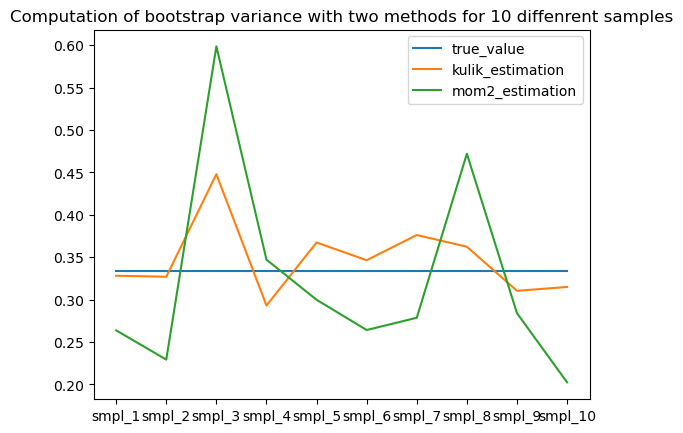

In [8]:
from extreme_utils import *
from kulik_soulier_utils import *
from de_hann_98_utils import *
import matplotlib.pyplot as plt


method_kulik = {"method_name": "kulik_poisson_block_size_5",
            "method": "get_bootstrap_variance_est_kulik",
            "weight_distribution": "poisson",
            "kulik_downsampling_procedure": "none",
            "size_sample_bootstrap_ratio": "none",
            "block_size":5,
            "dwnsmplng_choices": "global, per_block, none",
            "method_bootstrap": {
               "method_name": "iid",
               "size_sample_bootstrap_ratio": 1
            }}
method_de_hann = {"method_name": "de_haan_98",
            "method": "get_bootstrap_variance_est_de_hann_98",
            "method_bootstrap": {
               "method_name": "iid",
               "size_sample_bootstrap_ratio": 1
            }
            }

kulik_var_estimation_list = list()
mom_2_var_estimation_list = list()
true_value = [1/3 for i in range(10)]
experience_list = [f"smpl_{i+1}" for i in range(10)]
for sample_size in [2000 for i in range(10)]:
    sample = get_frechet_sample(3, 2000)
    std_kul, _ = get_bootstrap_variance_est_kulik(method_kulik, sample,
                                    100,
                                    None,
                                    200)
    kulik_var_estimation_list.append(std_kul)
    
    std_mom2, _ = get_bootstrap_variance_est_de_hann_98(method_de_hann, sample,
                                      100,
                                      2000,
                                      200)
    mom_2_var_estimation_list.append(std_mom2)
plt.plot(experience_list,true_value,label = "true_value")
plt.plot(experience_list,kulik_var_estimation_list,label = "kulik_estimation")
plt.plot(experience_list,mom_2_var_estimation_list,label = "mom2_estimation")
plt.legend()
plt.title("Computation of bootstrap variance with two methods for 10 diffenrent samples")
plt.show()


In [57]:
from extreme_utils import *

method = None
sample = get_frechet_sample(1, 2000)
for i in range(5,25,2):
    sample_ma = get_ma_sample(3,2000,i,distrib="frechet")
    # print(np.sum([1-np.isnan(unbiaised_gamma_mercadier_zhou(sample_ma, int(2000*r/100))) for r in range(1,100)]))
    print(np.sum([1-np.isnan(unbiaised_gamma_gomes_dehaan_rodrigues(sample_ma, int(2000*r/100))) for r in range(5,100,5)]))
    # print([unbiaised_gamma_mercadier_zhou(sample_ma, int(2000*r/100)) for r in range(1,100)])
    print([unbiaised_gamma_gomes_dehaan_rodrigues(sample_ma, int(2000*r/100))  for r in range(1,100) ])


19
[0.43895346475659924, 0.2939195821501638, 0.22838201841621855, 0.16278776976823914, 0.17188378695916107, 0.15147242520337786, 0.19530908239075265, 0.24870391398258632, 0.22605634225249607, 0.24998554423172487, 0.29510508709606464, 0.2677033040656185, 0.2565495374215813, 0.23117161526341007, 0.22301791140158514, 0.21951473521969936, 0.23834577334202567, 0.22685911662543562, 0.21659890681640817, 0.20667183689389002, 0.1978501837595082, 0.21167654274955178, 0.20716914098832886, 0.2149716755845361, 0.2221807969419854, 0.23791679864522958, 0.2529573252606171, 0.2603690514734933, 0.25654681574907445, 0.24971771876450702, 0.24784726713371427, 0.25403865388190394, 0.2726998765622549, 0.27913535349372454, 0.30696467353987217, 0.2984092509831762, 0.3032654197601963, 0.3315178147845901, 0.31264563773965276, 0.32630643243402613, 0.33839964148084695, 0.3327237476445831, 0.3391091562967596, 0.3451748960556241, 0.34716945905069774, 0.36290174955993476, 0.3619384760897496, 0.3710351541981852, 0.378

In [35]:
# unbiaised_gamma_gomes_dehaan_rodrigues(sample_ma, int(200/200))
# rho_2_gomes_de_haan_rodrigues(int(200/200), sample)
k = int(2000 * 100/100)
# gamma_biaised = gamma_moment_1_estimator(k, sample)
# m2 = gamma_moment_alpha(k, sample, 2)
# m3 = gamma_moment_alpha(k, sample, 3)
# m2 = gamma_moment_alpha(k, sample, 2)
# m1 = gamma_moment_alpha(k, sample, 1)
# num_t2 = m1**2 - (m2/2)
# denom_t2 = (m2/2) - (m3/6)**2/3
# t2 = num_t2 / denom_t2
# num = - np.abs(3*t2-1)
# denom = np.abs(t2-3)
# rho2 = - num / denom
# num_b = m2 - 2*gamma_biaised**2
# denom_2 = 2*gamma_biaised*rho2/(1-rho2)
# biais = num_b / denom_2
# gamma_biaised - biais
unbiaised_gamma_gomes_dehaan_rodrigues(sample_ma, int(2000))
gamma_biaised = gamma_moment_1_estimator(k, sample_ma)
m2 = gamma_moment_alpha(k, sample_ma, 2)
rho2 = rho_2_gomes_de_haan_rodrigues(k, sample_ma)
num_b = m2 - 2*gamma_biaised**2
denom_2 = 2*gamma_biaised*rho2/(1-rho2)
biais = num_b / denom_2
gamma_biaised - biais

nan

In [56]:
get_student_sample(2, 2000)

array([ 0.58499162, -1.24243308,  0.26205665, ..., -0.52857019,
       -0.24105794,  0.4287857 ])

In [44]:
# gamma_moment_1_estimator(1900, sample_ma)

sorted_sample = np.sort(sample_ma)
k_largest_samples = sorted_sample[-k:]
kest_largest = sorted_sample[-k]
moment_1_estimator = np.mean(np.log(k_largest_samples)-np.log(kest_largest))
moment_1_estimator

C:\Users\Antoine\AppData\Local\Temp\ipykernel_22148\186633128.py:6: RuntimeWarning: invalid value encountered in log
  moment_1_estimator = np.mean(np.log(k_largest_samples)-np.log(kest_largest))


nan

In [49]:
k_largest_samples - kest_largest

array([0.        , 0.02599809, 0.03754465, ..., 2.14487957, 2.16323199,
       2.17722243])

In [50]:
np.log(k_largest_samples)

C:\Users\Antoine\AppData\Local\Temp\ipykernel_22148\1480073263.py:1: RuntimeWarning: invalid value encountered in log
  np.log(k_largest_samples)


array([        nan,         nan,         nan, ..., -0.21475086,
       -0.19225696, -0.17544295])

In [52]:
sorted_sample

array([-1.33813716, -1.31213907, -1.30059251, ...,  0.80674241,
        0.82509483,  0.83908527])

In [51]:
k_largest_samples

array([-1.33813716, -1.31213907, -1.30059251, ...,  0.80674241,
        0.82509483,  0.83908527])

In [1]:
from extreme_utils import *

gamma_plots_in_front_of_k_order_stats

<function extreme_utils.gamma_plots_in_front_of_k_order_stats(d, inv_gamma, config_path, config, path_run)>

In [2]:
import random as random

for i in range(20):
    print(random.randint(0,9))

9
0
4
5
8
1
2
6
4
4
8
5
5
3
6
0
8
7
3
8


In [6]:
sample

array([0.967369  , 0.98044608, 1.19099071, 1.13497003, 1.31440156,
       1.14574116, 1.06113376, 1.09288977, 1.08382369, 1.21917881])

In [9]:
from extreme_utils import *
import random as random


method1 = {"alea": "deterministic",
           "deterministic_value": 9}
method2 = {"alea": "geometric",
           "size_expectancy": 9}
sample_size = 10
sample = get_frechet_sample(10, sample_size)
for i in range(50):
    b_1 = get_random_block_size(method1, sample_size)
    b_2 = get_random_block_size(method2, sample_size)
    print("method1:", len(get_random_block(sample,b_1)), "___ method2: ", len(get_random_block(sample,b_2)))


method1: 9 ___ method2:  2
method1: 9 ___ method2:  10
method1: 9 ___ method2:  5
method1: 9 ___ method2:  10
method1: 9 ___ method2:  2
method1: 9 ___ method2:  10
method1: 9 ___ method2:  5
method1: 9 ___ method2:  4
method1: 9 ___ method2:  5
method1: 9 ___ method2:  7
method1: 9 ___ method2:  10
method1: 9 ___ method2:  9
method1: 9 ___ method2:  8
method1: 9 ___ method2:  10
method1: 9 ___ method2:  5
method1: 9 ___ method2:  5
method1: 9 ___ method2:  10
method1: 9 ___ method2:  10
method1: 9 ___ method2:  10
method1: 9 ___ method2:  10
method1: 9 ___ method2:  5
method1: 9 ___ method2:  10
method1: 9 ___ method2:  7
method1: 9 ___ method2:  7
method1: 9 ___ method2:  3
method1: 9 ___ method2:  9
method1: 9 ___ method2:  5
method1: 9 ___ method2:  10
method1: 9 ___ method2:  10
method1: 9 ___ method2:  6
method1: 9 ___ method2:  2
method1: 9 ___ method2:  3
method1: 9 ___ method2:  1
method1: 9 ___ method2:  10
method1: 9 ___ method2:  3
method1: 9 ___ method2:  10
method1: 9 ___

In [6]:
random.randint(0,0)

0

In [ ]:
from extreme_utils import *

method = None
sample = get_frechet_sample(10, 2000)
for i in range(5,25,2):
    sample_ma = get_ma_sample(2,2000,i)
    print([unbiaised_gamma_mercadier_zhou(sample_ma, int(2000*r/50)) for r in range(1,50)])



c:\Users\Antoine\Desktop\JupyterNotebooks\bootstrap_extreme\extreme_utils.py:165: RuntimeWarning: invalid value encountered in sqrt
  num = -4 +6*s2 + np.sqrt(3*s2 -2)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[0.6982517889492266, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[

In [ ]:
from extreme_utils import *

method = None
sample = get_frechet_sample(10, 2000)
for i in range(5,25,2):
    sample_ma = get_ma_sample(2,2000,i)
    print([unbiaised_gamma_mercadier_zhou(sample_ma, int(2000*r/50)) for r in range(1,50)])



c:\Users\Antoine\Desktop\JupyterNotebooks\bootstrap_extreme\extreme_utils.py:165: RuntimeWarning: invalid value encountered in sqrt
  num = -4 +6*s2 + np.sqrt(3*s2 -2)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[0.6982517889492266, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[